/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


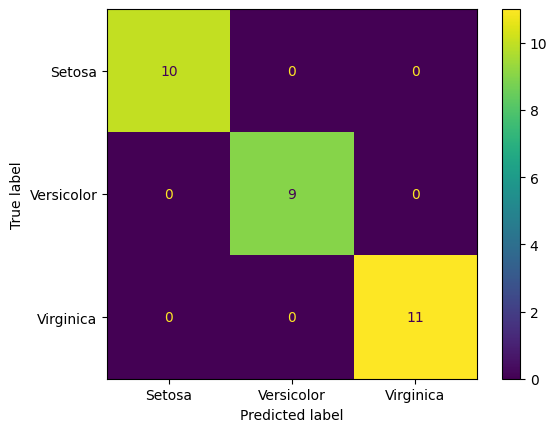

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the Iris dataset
iris =  pd.read_csv("iris.csv")
iris.head()

X=iris.drop('species',axis='columns')# Features (sepal length, sepal width, petal length, petal width)
y = iris.species # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Logistic Regression model
# Use 'multinomial' for multi-class classification and 'lbfgs' solver
model = LogisticRegression(multi_class='multinomial')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Setosa", "Versicolor", "Virginica"])

cm_display.plot()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'0.37 is less than 0.5 which means person with 35 will not buy the insurance'

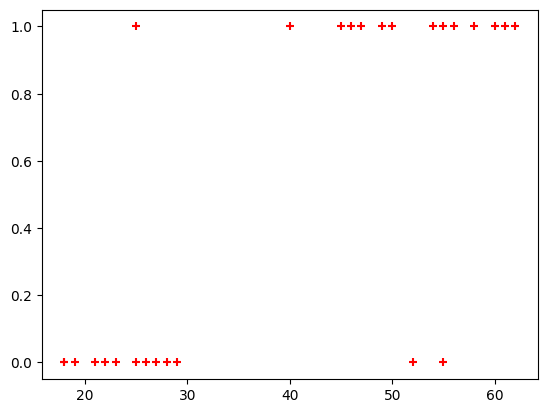

In [ ]:
# -*- coding: utf-8 -*-
"""LogisticRegression_Binary.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1M8PXdcmPsrQtqyVXpET3sgghAMr_MCg5
"""

# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
from matplotlib import pyplot as plt
# %matplotlib inline
#"%matplotlib inline" will make your plot outputs appear and be stored within the notebook.

df = pd.read_csv("insurance_data.csv")
df.head()

plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

X_test

y_test

y_predicted = model.predict(X_test)
y_predicted

model.score(X_test,y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[60]])
y_predicted

#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)

"""0.37 is less than 0.5 which means person with 35 will not buy the insurance"""

Data Overview:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  

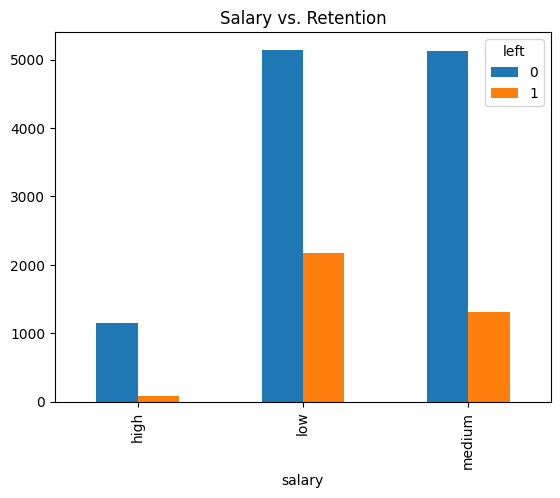

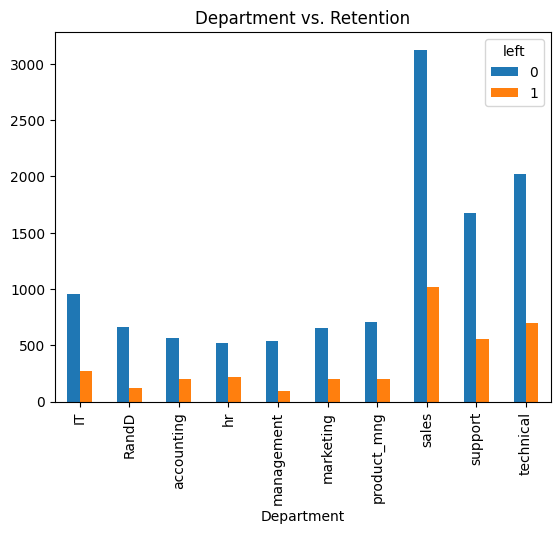

Model Accuracy: 0.7813333333333333


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


"""Performs EDA and identifies key variables affecting retention."""
print("Data Overview:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

pd.crosstab(df['salary'], df['left']).plot(kind='bar')
plt.title("Salary vs. Retention")
plt.show()
pd.crosstab(df['Department'], df['left']).plot(kind='bar')
plt.title("Department vs. Retention")
plt.show()



df_with_dummies = pd.get_dummies(df, columns=['salary'], drop_first=True)  # Convert salary to numerical
df_with_dummies
df_with_dummies = pd.get_dummies(df, columns=['salary', 'Department'], drop_first=True)  # Convert salary and Department to numerical
X = df_with_dummies[["satisfaction_level",	"last_evaluation",	"number_project",	"average_montly_hours"	,"time_spend_company",	"Work_accident",		"promotion_last_5years" ,"salary_low","salary_medium", 'Department_RandD', 'Department_accounting', 'Department_hr', 'Department_management', 'Department_marketing', 'Department_product_mng', 'Department_sales', 'Department_support', 'Department_technical']]  # Include all generated dummy columns for Department
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
model
X_test
y_test

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: 

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1

    accuracy                           0.95        21
   macro avg       0.75      0.83      0.78        21
weighted avg       0.93      0.95      0.94        21



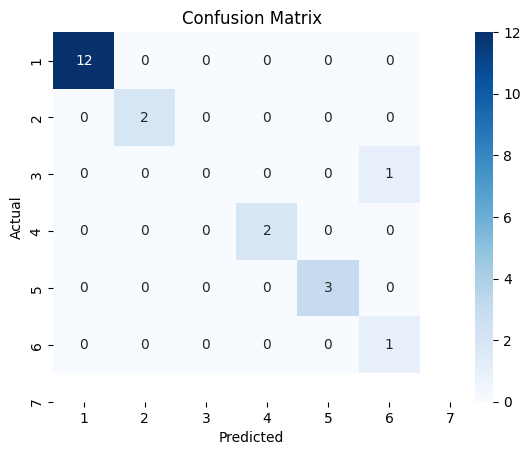

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the datasets
# If the file is not in /mnt/data/, update the path below to the correct path
zoo_data = pd.read_csv('zoo-data.csv')
zoo_class = pd.read_csv('zoo-class-type.csv') # Update if zoo-class-type.csv is in a different directory

# Merge the datasets on class_type if necessary
if 'class_type' in zoo_data.columns and 'class_type' in zoo_class.columns:
    merged_data = zoo_data.merge(zoo_class, on='class_type', how='left')
else:
    merged_data = zoo_data  # Assuming class_type is already labeled

# Separate features and target variable
X = merged_data.drop(columns=['class_type', 'animal_name'], errors='ignore')  # Drop non-numeric columns
y = merged_data['class_type']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the logistic regression model
model = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()